Members:

* FOZAME ENDEZOUMOU Armand Bryan
* Jessica MBOUNKAP
* Maheni SOUMAH
* LEUMALEU MBOUYOM Arnold Vianey
* William TOWA Darryl KENGNE
* Habiba  Djigo




# AdaBoost

Our job here is to implement a boosting algorithm introduced by Yoav Freund and Robert Schapire in 1997: **AdaBoost** (Adaptive Boosting).

Boosting is an ensemble method allowing calculations in sequences on weak classifiers. So $classifier_t$ corrects the error of $classifier_{t-1}$ and so on to have the smallest possible error. This method differs from the bagging method which allows calculations to be made independently.

# 1. Setup

All the libraries that we will use are imported below.



In [1]:
#Mount disk
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
#basics librairies
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt


In [3]:
#We imported datas from the previous case(Wine)
path_x_t= "/content/x_t (1).csv"
path_x_v = "/content/x_v (1).csv"
path_y_t= "/content/y_t (1).csv"
path_y_v = "/content/y_c (1).csv"

#load data
train_x = pd.read_csv(path_x_t)
valid_x = pd.read_csv(path_x_v)
train_y = pd.read_csv(path_y_t)
valid_y = pd.read_csv(path_y_v)
print("Data load correctly...")

Data load correctly...


In [4]:
#printed dimension of the datas imported
print("train_x shape: {}".format(train_x.shape))
print("valid_x shape: {}".format(valid_x.shape))
print("train_y shape: {}".format(train_y.shape))
print("valid_y shape: {}".format(valid_y.shape))

train_x shape: (4347, 1513)
valid_x shape: (1087, 1513)
train_y shape: (4347, 1)
valid_y shape: (1087, 1)


# 2. Modeling

We used the same dataset that we used in the previous project about classification and regression. We did the data preparation there.


AdaBoost improves the performance of any learning algorithm called weak classifiers. The principle is the wisdom of a host of experts. Every weak classifier is an expert. A random sample of data is selected, given a model, and then trained sequentially, that is, each model attempts to compensate for the weaknesses of its predecessor. Their predictions are then combined into a weighted sum that represents the prediction final boosted classifier. AdaBoost is adaptive in the sense that subsequent weak classifiers are adjusted in favor of samples misclassified by previous classifiers.

We continue the work of the first use case that of the Wine Dataset and to save time we will use the data which was used on the 1st case.

In [5]:
Ada= AdaBoostClassifier(random_state=0)
Ada.fit(train_x,train_y)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=0)

In [6]:
y_hat = Ada.predict(valid_x)
print("Predicted: \n")
print(y_hat)

Predicted: 

[1 1 1 ... 1 1 1]


# 3. Evaluation

We evaluate the model now

In [7]:
Acc= accuracy_score(valid_y,y_hat)
print("Accuracy with Adaboost: " +str(Acc))

Accuracy with Adaboost: 0.9944802207911684


I think we have a little overfit here because the previous model(XGBOOST) have 99.3 % but's okay.

In [8]:
print(classification_report(valid_y,y_hat))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       240
           1       1.00      1.00      1.00       847

    accuracy                           0.99      1087
   macro avg       0.99      0.99      0.99      1087
weighted avg       0.99      0.99      0.99      1087



In [9]:
def plot_roc_curve(y_true, y_scores, model_name='Model'):
    """
    Plot ROC curve for binary classification.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

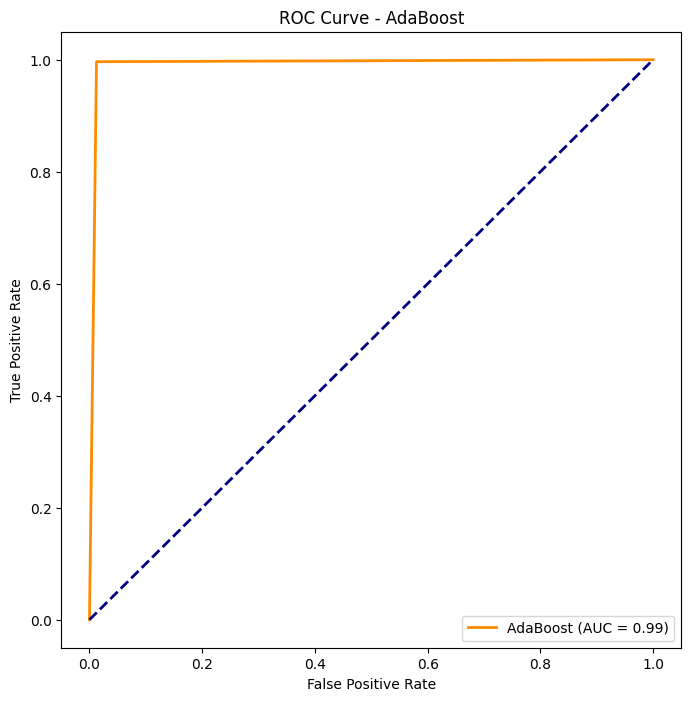

In [14]:
plot_roc_curve(valid_y, y_hat, model_name='AdaBoost')
